<a href="https://colab.research.google.com/github/souvik9998/image-identification-using-cnn/blob/main/image_identification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
zip_ref = zipfile.ZipFile('/content/image_identification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(
        rescale=1./255)
train_dataset = train_datagen.flow_from_directory(
        'train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
test_dataset = test_datagen.flow_from_directory(
        'test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1564 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(units=10 , activation='softmax')
])

In [5]:
cnn = tf.keras.models.Sequential()

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=128 , kernel_size=3 , activation='relu' , input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128 , kernel_size=3 , activation='relu' ))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2 , strides=2))

In [8]:
cnn.add(tf.keras.layers.Flatten())

In [9]:
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))

In [10]:
cnn.add(tf.keras.layers.Dense(units=10 , activation='softmax'))

In [11]:
cnn.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [12]:
cnn.fit(x = train_dataset , validation_data = test_dataset , epochs = 10)

Epoch 1/10
49/49 [==============================] - 17s 105ms/step - loss: 1.9606 - accuracy: 0.3248 - val_loss: 1.2953 - val_accuracy: 0.4200
Epoch 2/10
49/49 [==============================] - 4s 83ms/step - loss: 1.1405 - accuracy: 0.6304 - val_loss: 0.8675 - val_accuracy: 0.7200
Epoch 3/10
49/49 [==============================] - 5s 100ms/step - loss: 0.8457 - accuracy: 0.7161 - val_loss: 0.5696 - val_accuracy: 0.8000
Epoch 4/10
49/49 [==============================] - 4s 83ms/step - loss: 0.7066 - accuracy: 0.7903 - val_loss: 0.7242 - val_accuracy: 0.7600
Epoch 5/10
49/49 [==============================] - 4s 83ms/step - loss: 0.5700 - accuracy: 0.8184 - val_loss: 0.3198 - val_accuracy: 0.8600
Epoch 6/10
49/49 [==============================] - 5s 101ms/step - loss: 0.4571 - accuracy: 0.8440 - val_loss: 0.4893 - val_accuracy: 0.8200
Epoch 7/10
49/49 [==============================] - 4s 83ms/step - loss: 0.3702 - accuracy: 0.8868 - val_loss: 0.3238 - val_accuracy: 0.9400
Epoch 8/1

In [14]:
cnn.save_weights('bird_model.h5')

In [15]:
cnn.save(r'bird_model.h5')

In [16]:
cnn.load_weights('bird_model.h5')

In [17]:
import numpy as np

In [39]:
train_dataset.class_indices

{'JANDAYA PARAKEET': 0,
 'JAPANESE ROBIN': 1,
 'JAVA SPARROW': 2,
 'JOCOTOCO ANTPITTA': 3,
 'KAGU': 4,
 'KAKAPO': 5,
 'KILLDEAR': 6,
 'KING EIDER': 7,
 'KING VULTURE': 8,
 'KIWI': 9}

In [40]:
import cv2;

In [49]:
test_img = cv2.imread('parakeet.jpg')

In [50]:
import matplotlib.pyplot as plt

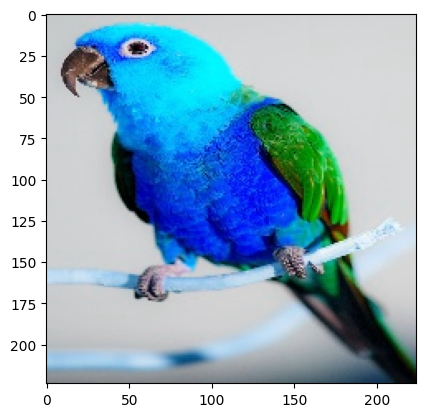

In [51]:
plt.imshow(test_img)

In [52]:
import keras.utils as image
test_image = image.load_img('parakeet.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 28ms/step


In [53]:
y_predicted = cnn.predict(test_image)
y_predicted[0]

1/1 [==============================] - 0s 18ms/step


array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [54]:
cn=np.argmax(y_predicted[0])
print(cn)

0


In [55]:
if cn==0 :
    print('JANDAYA PARAKEET')
elif cn==1 :
    print('JAPANESE ROBIN')
elif cn==2 :
    print('JAVA SPARROW')
elif cn==3 :
    print('JOCOTOCO ANTPITTA')
elif cn==4 :
    print('KAGU')
elif cn==5 :
    print('KAKAPO')
elif cn==6 :
    print('KILLDEAR')
elif cn==7 :
    print('KING EIDER')
elif cn==8 :
    print('KING VULTURE')
elif cn==9 :
    print('KIWI')

JANDAYA PARAKEET
